<a href="https://colab.research.google.com/github/iMan0405/Portfolio_DT_vs_AI/blob/main/EcoLeaf_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from fastai.vision.all import *
from ipywidgets import widgets

In [17]:
path = Path('/content/drive/MyDrive/EcoLeaf')
path.ls()
fls = get_image_files(path)
fls

(#3512) [Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/image29.jpeg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/image28.jpeg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/image11.jpeg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/image17.jpeg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/image25.jpeg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/images.jpg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/images15.jpg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/image19.jpeg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/images7.jpg'),Path('/content/drive/MyDrive/EcoLeaf/Barg_cheti_burishishi/image13.jpeg')...]

In [18]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

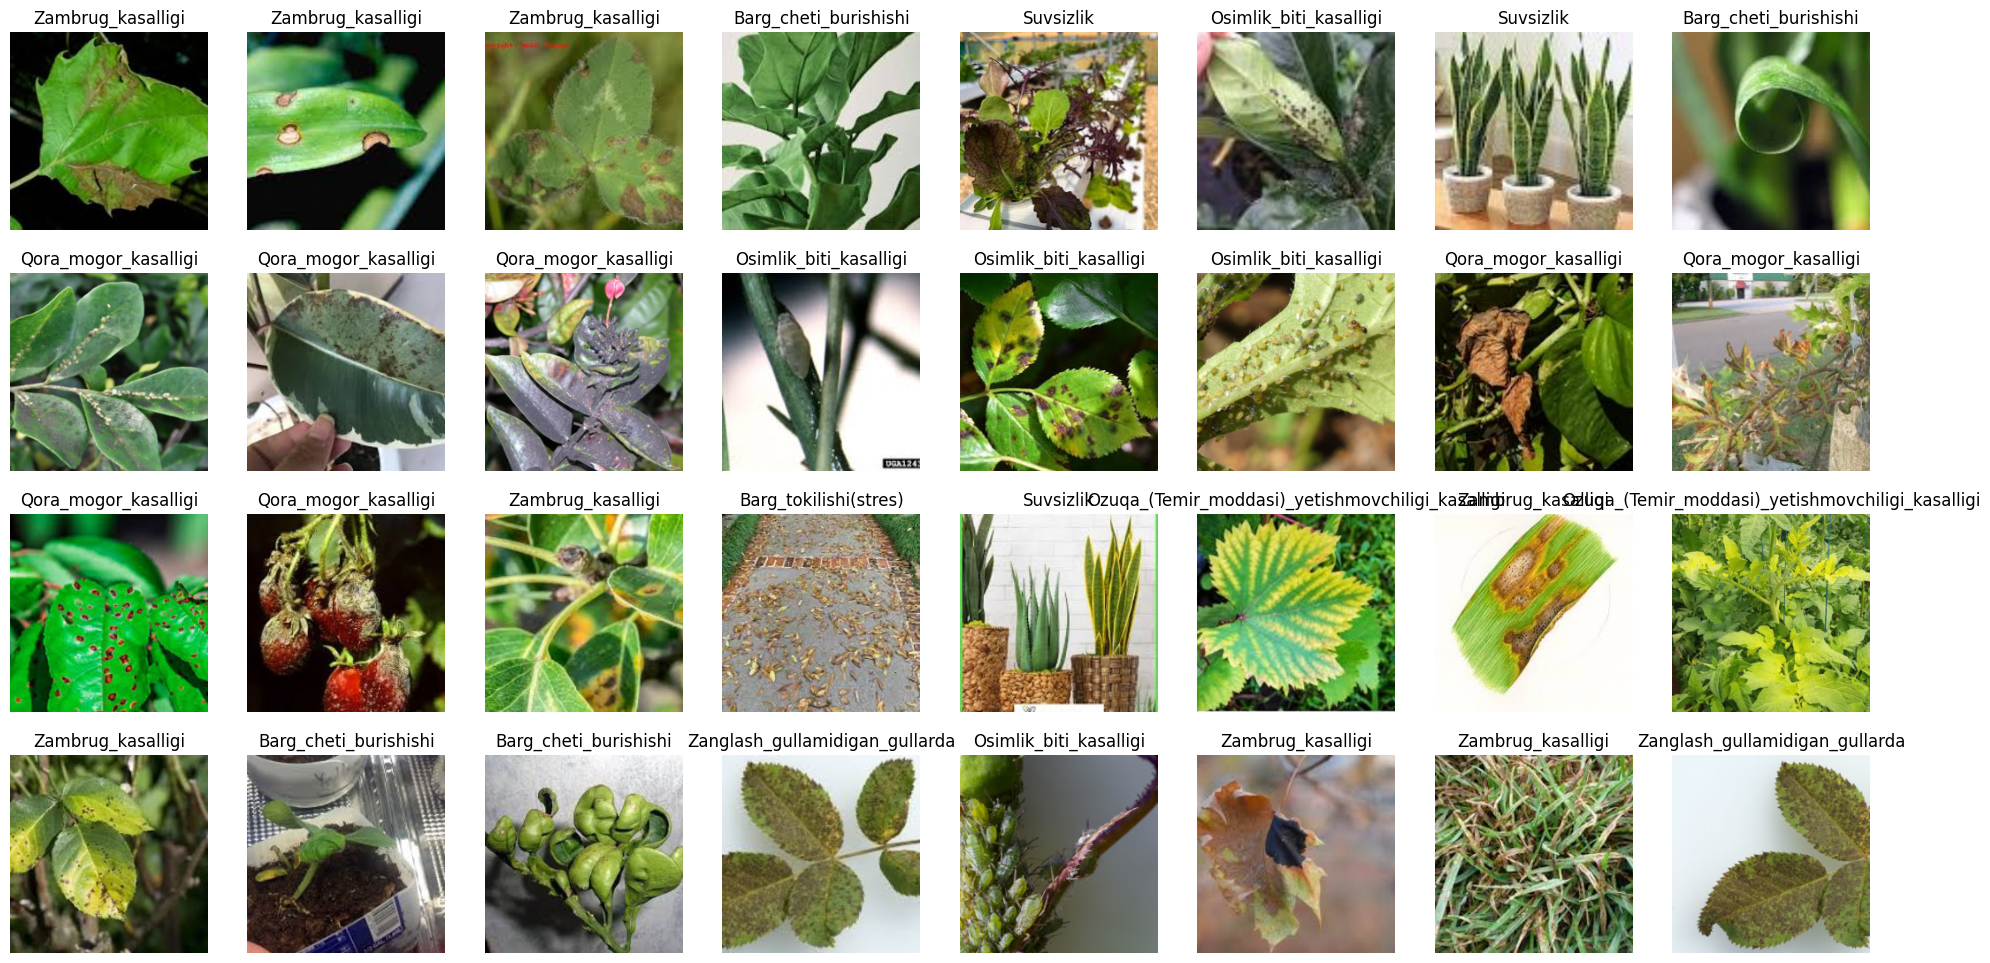

In [19]:
#DataBlock yaratamiz
person_nature = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#Dataloader yaratamiz
dls = person_nature.dataloaders(path)

#Datasetni tekshiramiz

dls.train.show_batch(max_n=32, nrows=4)

In [21]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(40)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


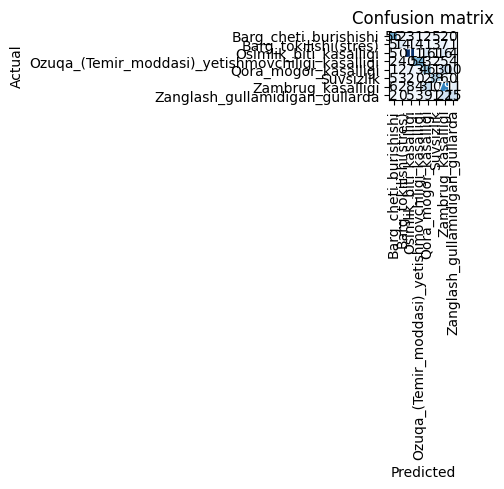

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

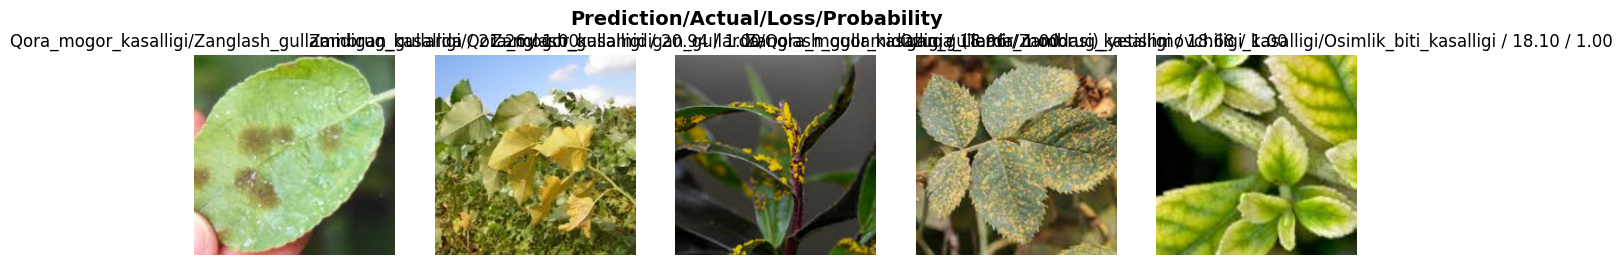

In [23]:
interp.plot_top_losses(5, nrows=1)

In [24]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

bashorat: Suvsizlik.
aniqlilik darajasi: 59.7%


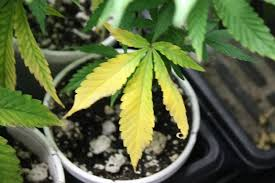

In [25]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
if pred == 'Barg_cheti_burishishi':
  print(f"bashorat: Barg burishishi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Barg_tokilishi(stres)':
  print(f"bashorat: Barg to'kilishi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Osimlik_biti_kasalligi':
  print(f"bashorat: O'simlik biti.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Ozuqa_(Temir_moddasi)_yetishmovchiligi_kasalligi':
  print(f"bashorat: Ozuqa yetishmasligi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Qora_mogor_kasalligi':
  print(f"bashorat: Qora mog'or kasalligi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Suvsizlik':
  print(f"bashorat: Suvsizlik.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Zambrug_kasalligi':
  print(f"bashorat: Zambrug' kasalligi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Zanglash_gullamidigan_gullarda':
  print(f"bashorat: Zanglash.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
else:
  print('No Data')
img

In [30]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

bashorat: Barg burishishi.
aniqlilik darajasi: 98.7%


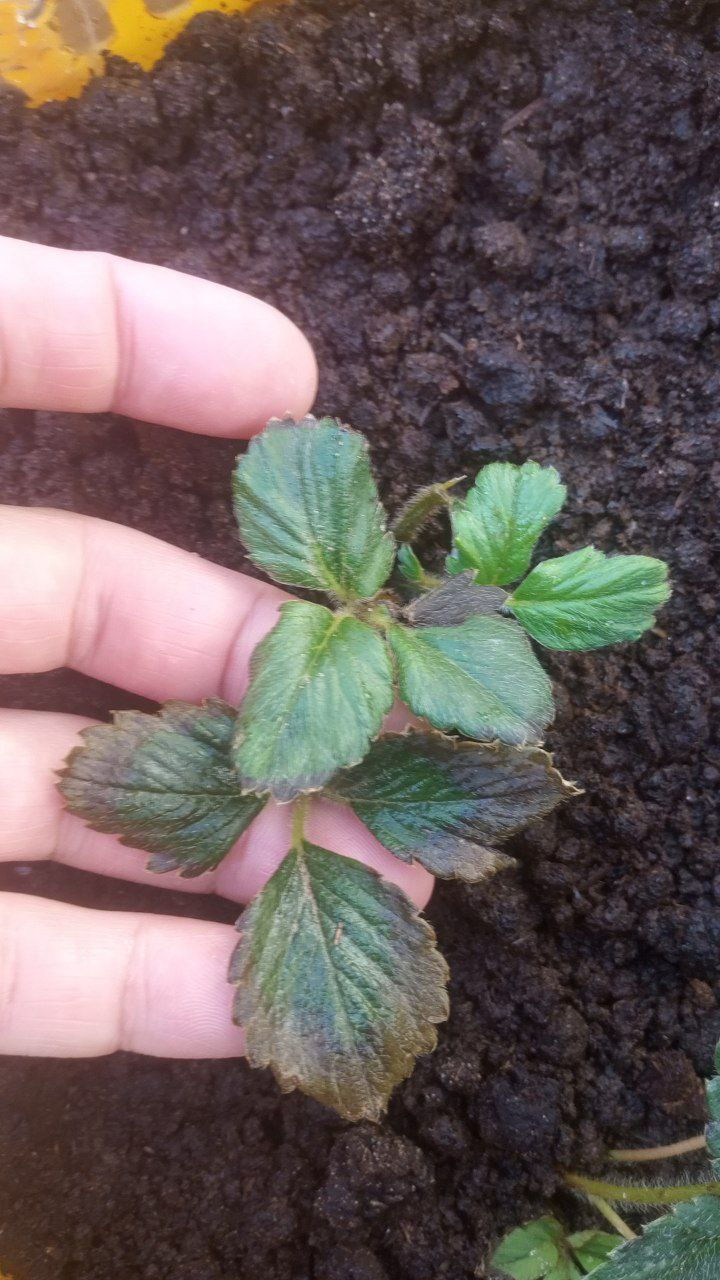

In [31]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
if pred == 'Barg_cheti_burishishi':
  print(f"bashorat: Barg burishishi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Barg_tokilishi(stres)':
  print(f"bashorat: Barg to'kilishi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Osimlik_biti_kasalligi':
  print(f"bashorat: O'simlik biti.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Ozuqa_(Temir_moddasi)_yetishmovchiligi_kasalligi':
  print(f"bashorat: Ozuqa yetishmasligi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Qora_mogor_kasalligi':
  print(f"bashorat: Qora mog'or kasalligi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Suvsizlik':
  print(f"bashorat: Suvsizlik.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Zambrug_kasalligi':
  print(f"bashorat: Zambrug' kasalligi.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'Zanglash_gullamidigan_gullarda':
  print(f"bashorat: Zanglash.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
else:
  print('No Data')
img

In [ ]:
import pickle

filename = 'gulim.pkl'
with open(filename, 'wb') as file:
    pickle.dump(learn, file)